In [1]:
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-jxpb99p9
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-jxpb99p9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ebn6gjuh/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [3]:
!sudo pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


## Importing Libraries

In [0]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

## Initialize the FaceDetector

In [5]:
faceDetector = MTCNN()

W0617 12:55:00.990382 140210410006400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0617 12:55:01.035552 140210410006400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0617 12:55:02.335110 140210410006400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0617 12:55:02.336959 140210410006400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 12:55:02.349983 140210410006400 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/layer_factory.py:7

## Getting Faces

In [0]:
def extractFaces(imagePath,targetSize=(224,224)):
  img = plt.imread(imagePath)
  result = faceDetector.detect_faces(img)
  faces = []
  for i in range(len(result)):
    x1, y1, width, height = result[i]['box']
    x2, y2 = x1 + width, y1 + height
    face = img[y1:y2, x1:x2]
    face = Image.fromarray(face)
    face = face.resize(targetSize)
    faceArray = asarray(face)
    faces.append(faceArray)
  return faces

In [0]:
knownFace = extractFaces("vikram2.jpg")

## Getting Embeddings

In [0]:
def getFaceEmbedding(faces):
  faces = asarray(faces,"float32")
  preprocessFaces = preprocess_input(faces, version=2)
  model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
  faceEmbeddings = model.predict(preprocessFaces)
  return faceEmbeddings

In [79]:
knownFaceEmbeddings = getFaceEmbedding(faces)
knownFaceEmbeddings.shape

(1, 2048)

In [0]:
testFace = extractFaces("vikram.jpeg")
testFaceEmbedding = getFaceEmbedding(testFaces)

In [85]:
testFaceEmbedding.shape

(1, 2048)

##  Face Match Logic

In [0]:
def faceMatch(knownFace,knownFaceEmbeddings,testFace,testFaceEmbedding):
  score = cosine(knownFaceEmbeddings, testFaceEmbedding)
  fig, axes = plt.subplots(nrows=1, ncols=2)  
  axes[0].imshow(np.array(knownFace).reshape((224,224,3)))
  axes[1].imshow(np.array(testFace).reshape((224,224,3)))
  if(score<=0.5):
    print("Face Match.. Score :- "+str(score))
  else:
    print("Face Not Match.. Score :- "+str(score))

## Results

Face Match.. Score :- 0.12547093629837036


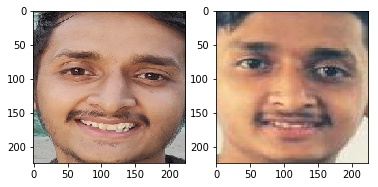

In [87]:
faceMatch(knownFace,knownFaceEmbeddings,testFace,testFaceEmbedding)

In [0]:
testFace = extractFaces("sahil.jpg")
testFaceEmbedding = getFaceEmbedding(testFace2)

Face Not Match.. Score :- 0.6107587218284607


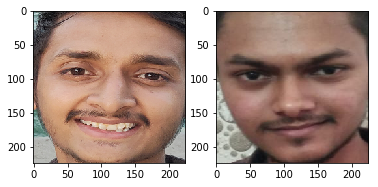

In [89]:
faceMatch(knownFace,knownFaceEmbeddings,testFace,testFaceEmbedding)